In [1]:
#Importing libraries

import numpy as np
from numpy import ndarray
import math

import pandas as pd
from collections import defaultdict
import csv

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import gridspec
from matplotlib import colors as mcolors

from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
from scipy.special import factorial

In [15]:
#Importing data

columns = defaultdict(list)

with open('counting.csv', 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        for (k,v) in row.items():
            columns[k].append(v)
            while '' in columns[k]:
                columns[k].remove('')
                

J1 = list(map(int,columns['E11g']))
J2 = list(map(int,columns['E12g']))
J3 = list(map(int,columns['E13g']))

freq1 = 5
T1 = 1/freq1

tim1 = 5*60

zipped1 = zip(J1,J2,J3)
sumdat1 = [sum(item) for item in zipped1]

d1 = np.array([J1,J2,J3])
leng1 = len(d1)

K1 = list(map(int,columns['E21g']))
K2 = list(map(int,columns['E22g']))
K3 = list(map(int,columns['E23g']))

T2 = 2

zipped2 = zip(K1,K2,K3)
sumdat2 = [sum(item) for item in zipped2]

d2 = np.array([K1,K2,K3])
leng2 = len(d2)

R1 = list(map(int, columns['E31g']))
R2 = list(map(int, columns['E32g']))
R3 = list(map(int, columns['E33g']))
R4 = list(map(int, columns['E34g']))
R5 = list(map(int, columns['E35g']))
R6 = list(map(int, columns['E36g']))
R7 = list(map(int, columns['E37g']))
R8 = list(map(int, columns['E38g']))
R9 = list(map(int, columns['E39g']))
R10 = list(map(int, columns['E310g']))
R11 = list(map(int, columns['E311g']))
R12 = list(map(int, columns['E312g']))
R13 = list(map(int, columns['E313g']))
R14 = list(map(int, columns['E314g']))
R15 = list(map(int, columns['E315g']))
R16 = list(map(int, columns['E316g']))
R17 = list(map(int, columns['E317g']))
R18 = list(map(int, columns['E318g']))
R19 = list(map(int, columns['E319g']))
R20 = list(map(int, columns['E320g']))

freq3 = 10
T3 = 1/freq3

zipped3 = zip(R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20)
sumdat3 = [sum(item) for item in zipped3]

d3 = np.array([R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20])
leng3 = len(d3)

sumvert = [j for j in list(map(sum, d3))]

H1 = list(map(int,columns['E41g']))
H2 = list(map(int,columns['E42g']))
H3 = list(map(int,columns['E43g']))
H4 = list(map(int,columns['E44g']))
H5 = list(map(int,columns['E45g']))

T4 = 2

zipped4 = zip(H1,H2,H3,H4,H5)
sumdat4 = [sum(item) for item in zipped4]

d4 = np.array([H1,H2,H3,H4,H5])
leng4 = len(d4)


with open('techwed2019.csv', 'r') as g:
    reader = csv.DictReader(g)
    for row in reader:
        for (l,b) in row.items():
            columns[l].append(b)
            while '' in columns[k]:
                columns[l].remove('')

tech = np.array(list(map(int, columns['c'])))

In [159]:
#Defining functions

def poisson(x, lamb):
    return (lamb**x/factorial(x)) * np.exp(-lamb)

def gauss(x, mu, sig):
    return 1/(sig*np.sqrt(2*np.pi)*np.exp((x-mu)**2/(2*sig**2)))

def chi(func, y):
    return np.sum((y-func)**2/y)

def nozeros(dep, data):
    com = zip(dep, data)
    noz = [(val, key) for (val, key) in com if key != 0]
    l1, l2 = zip(*noz)
    return l1,l2

plt.rcParams.update({'font.size': 12})

def woke(data, NAME, per):
    gs = gridspec.GridSpec(2,1, height_ratios=[3,1])
    plt.figure(figsize=(7,7))
    bins=range(max(data)+1)
    ax0=plt.subplot(gs[0])
    plt.grid(True)
    e = plt.hist(data, bins, facecolor='green', alpha=0.75, rwidth=0.9, label=NAME)
    mean = np.mean(data)
    variance = np.var(data)
    sigma = np.sqrt(variance)
    x = np.linspace(min(data), max(data))
    entries, bin_edges, patches = e
    area = sum(np.diff(bin_edges)*entries)
    bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
    pparameters, pcov_matrix = curve_fit(poisson, bin_middles, entries/area)
    gparameters, gcov_matrix = curve_fit(gauss, bin_middles, entries/area)
    countg = np.abs(gparameters[0]/per)
    countp = np.abs(pparameters[0]/per)
    nzbin, nzent = nozeros(bin_middles, entries)
    chig = chi(area*gauss(nzbin, *gparameters), nzent)
    chip = chi(area*poisson(nzbin, *pparameters), nzent)
    plt.ylabel('Occurrence')
    plt.plot(x, area*poisson(x, *pparameters), 'r--', lw=2, label='Poissonian fit')
    plt.plot(x, area*gauss(x, *gparameters), 'b--', lw=2, label='Gaussian fit')
    plt.errorbar(bin_middles, entries, yerr=np.sqrt(entries), fmt='k.')
    ax1=plt.subplot(gs[1],sharex=ax0)
    plt.xlim((min(data), max(data)))
    plt.plot(x,0*x, 'k', lw=1)
    plt.errorbar(bin_middles, entries-area*gauss(bin_middles,*gparameters), yerr=np.sqrt(entries), fmt='b.', label='Residuals for Gaussian fit')
    plt.errorbar(bin_middles, entries-area*poisson(bin_middles,*pparameters), yerr=np.sqrt(entries), fmt='r.', label='Residuals for Poisson fit')
    ax0.legend(loc='upper right')
    ax1.legend(loc='upper right')
    plt.ylabel('Standardized residuals')
    plt.xlabel('Counts per time bin')
    plt.grid(True)
    plt.show()    
    print('Count rate Gauss')
    print(countg)
    print('Error:')
    print(4*gparameters[1]/np.sqrt(len(data)))
    print('Count rate Poisson')
    print(countp)
    print('Error:')
    print(4*np.sqrt(pparameters[0])/np.sqrt(len(data)))
    print('Chi squared Gauss:')
    print(chig)
    print('Chi squared Poisson')
    print(chip)
    return countg, countp

# EXP. 1

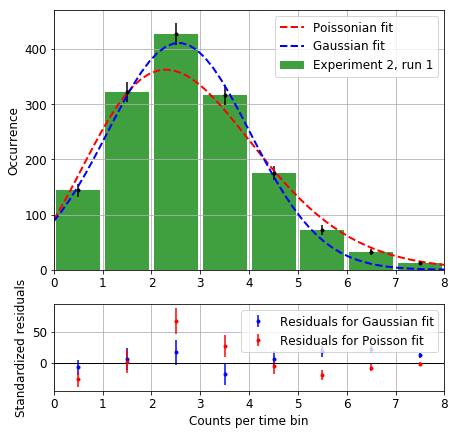

Count rate Gauss
12.795208353271498
Error:
0.150446343690471
Count rate Poisson
14.04651676786104
Error:
0.17304894821731068
Chi squared Gauss:
31.826620344725022
Chi squared Poisson
25.91711264344677


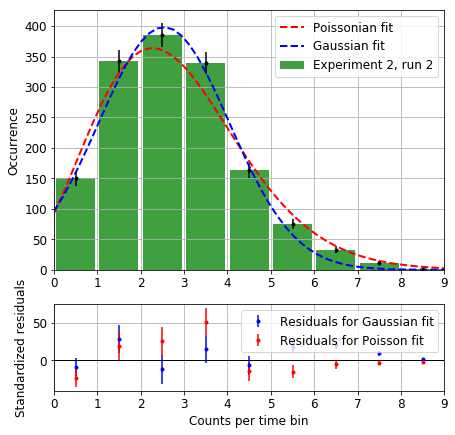

Count rate Gauss
12.694650861570457
Error:
0.15524210958709372
Count rate Poisson
13.947848270755935
Error:
0.172440093714694
Chi squared Gauss:
30.74066829207087
Chi squared Poisson
24.69938450995568


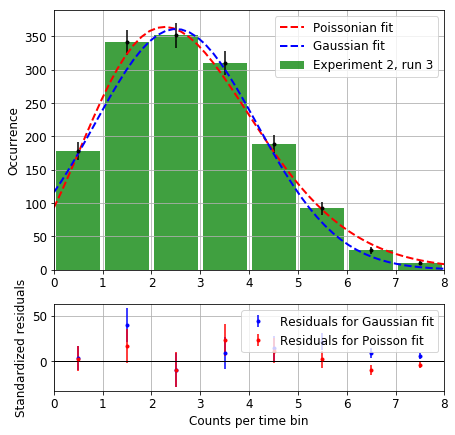

Count rate Gauss
12.49829771200486
Error:
0.17114585887600223
Count rate Poisson
13.90981238242991
Error:
0.172204810476797
Chi squared Gauss:
18.3422765421289
Chi squared Poisson
8.426940448184261
Summary of all runs:
Mean count Gauss:
12.662718975615604
Error:
0.07118632239071536
Mean count Poisson:
13.968059140348963
Error:
0.033261194226924515


In [160]:
avg11 = leng1*[0]
avg12 = leng1*[0]
for i in range(leng1):
    avg11[i], avg12[i] = woke(d1[i], 'Experiment 2, run %s' %(i+1), T1)
    
print('Summary of all runs:')
print('Mean count Gauss:')
print(np.mean(avg11))
print('Error:')
print(np.std(avg11)/np.sqrt(len(avg11)))
print('Mean count Poisson:')
print(np.mean(avg12))
print('Error:')
print(np.std(avg12)/np.sqrt(len(avg12)))

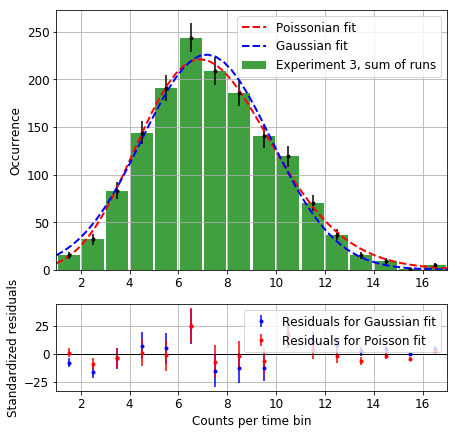

Count rate Gauss
11.925124649671776
Error:
0.27337516242537085
Count rate Poisson
12.333819132272712
Error:
0.2809562998876255
Chi squared Gauss:
31.446212068949666
Chi squared Poisson
31.218913621023447


(11.925124649671776, 12.333819132272712)

In [161]:
#Sum of all runs

woke(sumdat1, 'Experiment 3, sum of runs', T1*leng1)

# EXP. 2

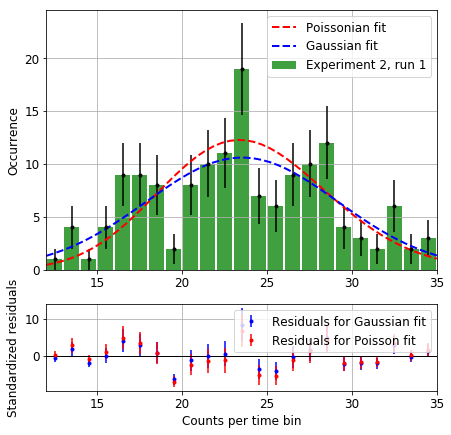

Count rate Gauss
11.764800443915886
Error:
1.8431247228642658
Count rate Poisson
11.935695509065821
Error:
1.5957072753486803
Chi squared Gauss:
44.06543773512086
Chi squared Poisson
49.80322937226225


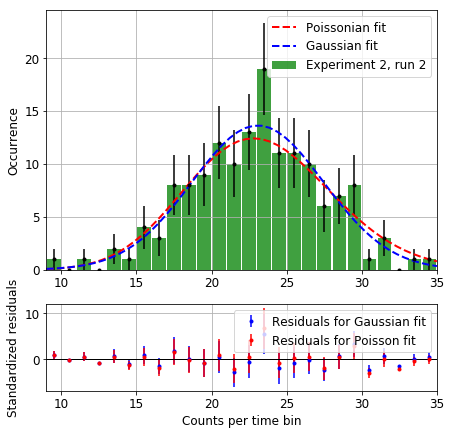

Count rate Gauss
11.537268254783813
Error:
1.4333805240504076
Count rate Poisson
11.648059847462271
Error:
1.5763627228925723
Chi squared Gauss:
14.543897559294583
Chi squared Poisson
17.9088899646141


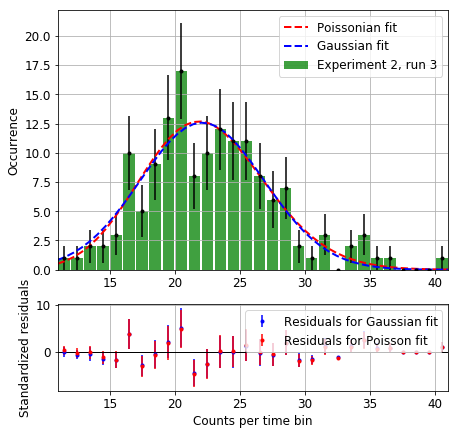

Count rate Gauss
11.04896797635403
Error:
1.5545119324974288
Count rate Poisson
11.17496722589472
Error:
1.5440184610913412
Chi squared Gauss:
21.70606483649019
Chi squared Poisson
20.80881703729489
Summary of all runs:
Mean count Gauss:
11.450345558351243
Error:
0.17241467891250226
Mean count Poisson:
11.586240860807605
Error:
0.1810727726863


In [162]:
avg21 = leng2*[0]
avg22 = leng2*[0]
for i in range(leng2):
    avg21[i], avg22[i] = woke(d2[i], 'Experiment 2, run %s' %(i+1), T2)
    
print('Summary of all runs:')
print('Mean count Gauss:')
print(np.mean(avg21))
print('Error:')
print(np.std(avg21)/np.sqrt(len(avg21)))
print('Mean count Poisson:')
print(np.mean(avg22))
print('Error:')
print(np.std(avg22)/np.sqrt(len(avg22)))

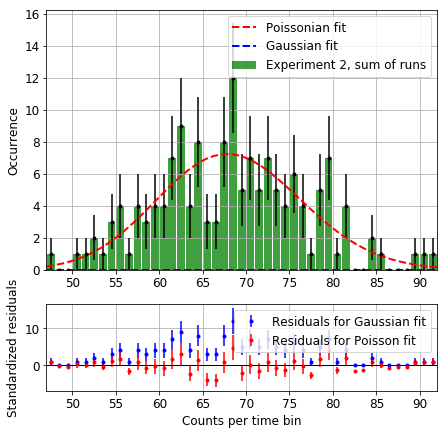

Count rate Gauss
10.82256351016501
Error:
12.485477220731571
Count rate Poisson
11.385989196558812
Error:
6.748626288826138
Chi squared Gauss:
149.99999999997738
Chi squared Poisson
39.926651681478994


(10.82256351016501, 11.385989196558812)

In [158]:
#Sum of all runs

woke(sumdat2, 'Experiment 2, sum of runs', T2*leng2)

# EXP. 4

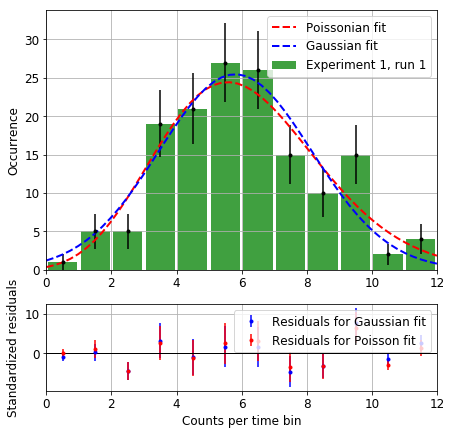

Count rate Gauss
2.903063124581531
Error:
0.7673967238690474
Count rate Poisson
3.039206766939362
Error:
0.8052105999553143
Chi squared Gauss:
14.915397088689241
Chi squared Poisson
14.644793193539702


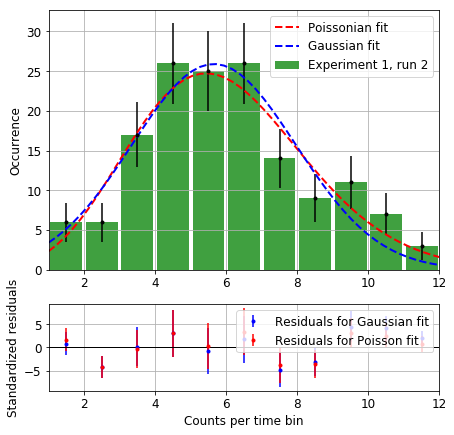

Count rate Gauss
2.825629153806105
Error:
0.7548354903929656
Count rate Poisson
2.971049513787952
Error:
0.7961305774022017
Chi squared Gauss:
11.91024319987426
Chi squared Poisson
8.74781122511922


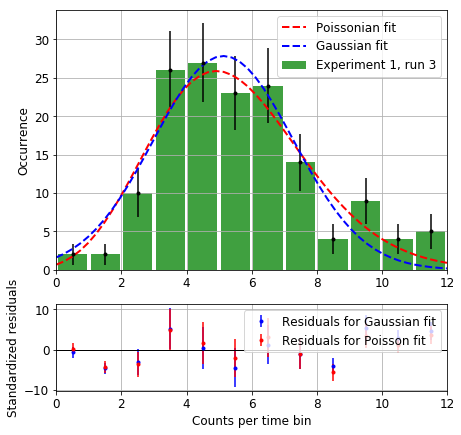

Count rate Gauss
2.5667830055159055
Error:
0.7017736706113024
Count rate Poisson
2.7115048825770085
Error:
0.7605618810785628
Chi squared Gauss:
28.081331822313516
Chi squared Poisson
24.61453121758504


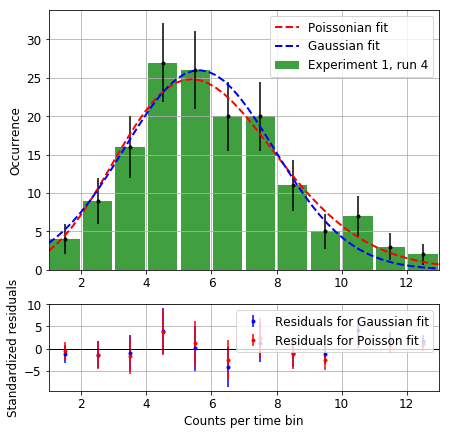

Count rate Gauss
2.810581997652368
Error:
0.7518787879091199
Count rate Poisson
2.9449506970054373
Error:
0.7926261090164097
Chi squared Gauss:
7.947060262667824
Chi squared Poisson
4.920038331577297


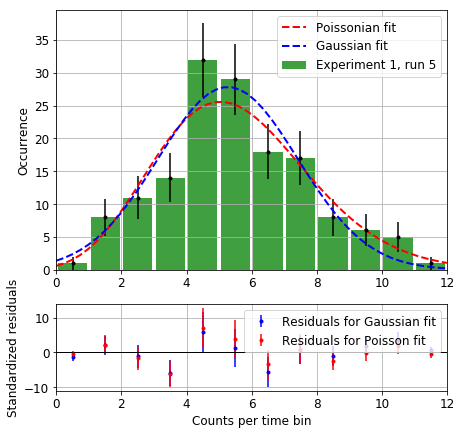

Count rate Gauss
2.6346694332445213
Error:
0.7017700763901509
Count rate Poisson
2.7746258436379776
Error:
0.7693634901502032
Chi squared Gauss:
11.54642867908701
Chi squared Poisson
8.429066254933288
Summary of all runs
Mean count Gauss:
2.748145342960086
Error:
0.05645198858636825
Mean count Poisson:
2.8882675407895473
Error:
0.05550061546060921


In [185]:
avg41 = leng4*[0]
avg42 = leng4*[0]
for i in range(leng4):
    avg41[i], avg42[i] = woke(d4[i], 'Experiment 1, run %s' %(i+1), 2)
    
print('Summary of all runs')
print('Mean count Gauss:')
print(np.mean(avg41))
print('Error:')
print(np.std(avg41)/np.sqrt(len(avg41)))
print('Mean count Poisson:')
print(np.mean(avg42))
print('Error:')
print(np.std(avg42)/np.sqrt(len(avg42)))

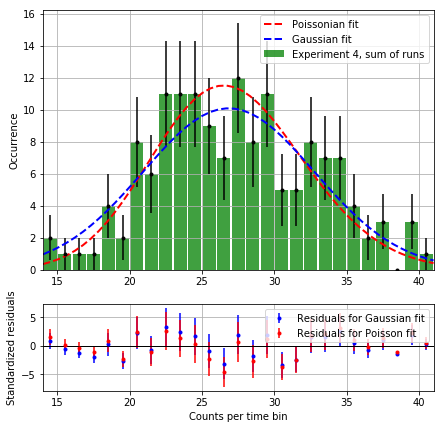

Count rate Gauss
2.6844700664938683
Error:
0.48363101730481134
Count rate Poisson
2.7004720337672534
Error:
0.42430115356644615
Chi squared Gauss:
21.478473105576192
Chi squared Poisson
20.72088228375945


(2.6844700664938683, 2.7004720337672534)

In [99]:
#Sum of all runs

woke(sumdat4, 'Experiment 4, sum of runs', T4*leng4)

# EXP. 3

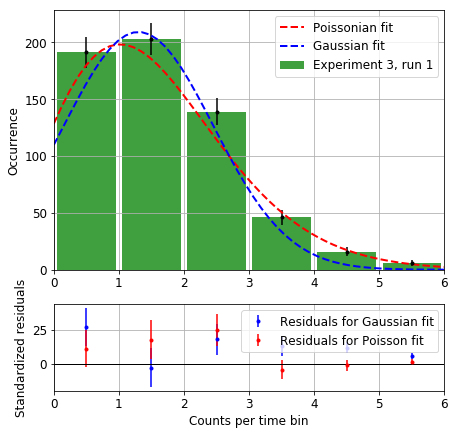

Count rate Gauss
13.014939672701724
Error:
0.04677973194563297
Count rate Poisson
15.435890596904636
Error:
0.050679066879575296
Chi squared Gauss:
23.83236668680243
Chi squared Poisson
7.315862459288257


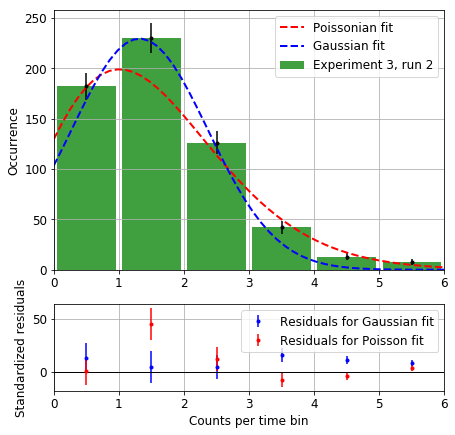

Count rate Gauss
13.19277684635568
Error:
0.04264865569843137
Count rate Poisson
15.341394144511447
Error:
0.05052370351024612
Chi squared Gauss:
24.03231439117763
Chi squared Poisson
13.92632486169811


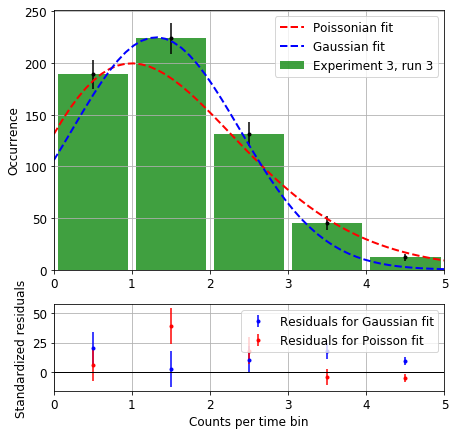

Count rate Gauss
13.084028931833808
Error:
0.043512553553876135
Count rate Poisson
15.227872221261443
Error:
0.05033642594829474
Chi squared Gauss:
17.516998309563668
Chi squared Poisson
11.572322063372724


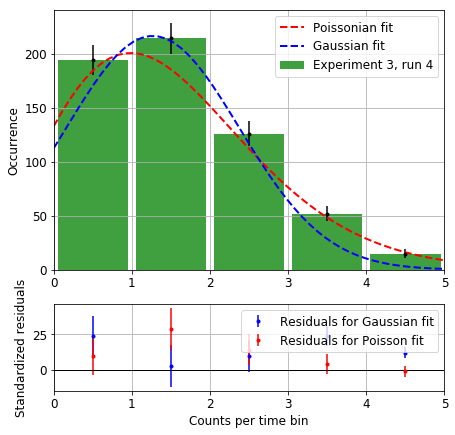

Count rate Gauss
12.669033904003438
Error:
0.045207667443933015
Count rate Poisson
15.091405973828179
Error:
0.05011037065212358
Chi squared Gauss:
23.829607952682576
Chi squared Poisson
6.288563228137201


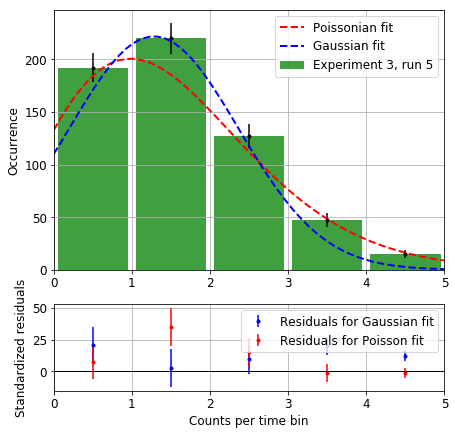

Count rate Gauss
12.804049014917158
Error:
0.0441006148327841
Count rate Poisson
15.08979210082215
Error:
0.05010769118220282
Chi squared Gauss:
21.82827438414342
Chi squared Poisson
7.711335844588488


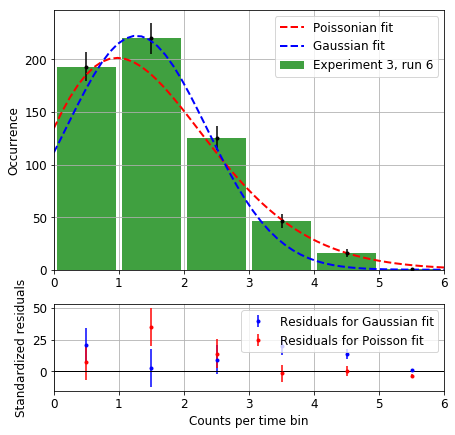

Count rate Gauss
12.68327416999465
Error:
0.043981390565505325
Count rate Poisson
14.979119969196866
Error:
0.04992360214815299
Chi squared Gauss:
23.699731757733968
Chi squared Poisson
18.30608332794947


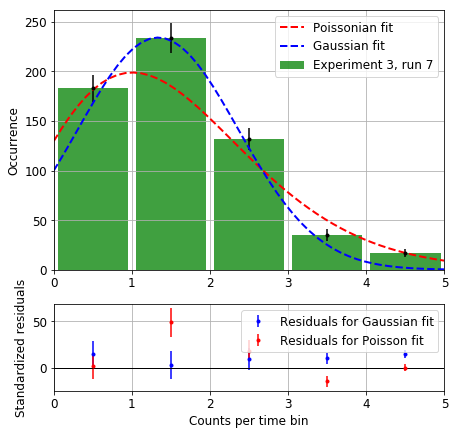

Count rate Gauss
13.344491270994151
Error:
0.04174790669374475
Count rate Poisson
15.32150195091742
Error:
0.05049093747602196
Chi squared Gauss:
18.120367952052014
Chi squared Poisson
18.924167125361347


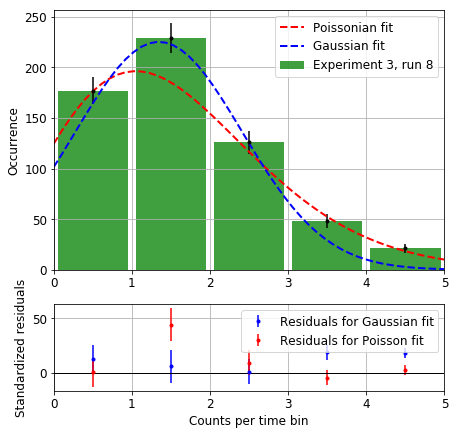

Count rate Gauss
13.43583399618145
Error:
0.04343788614909701
Count rate Poisson
15.738749768202128
Error:
0.05117382495735242
Chi squared Gauss:
24.4032050721155
Chi squared Poisson
9.919764241680202


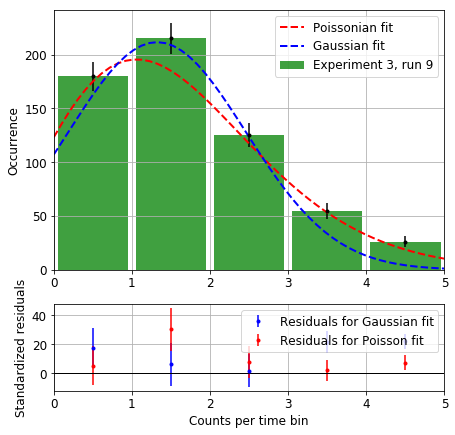

Count rate Gauss
13.223878532207983
Error:
0.04624023698217164
Count rate Poisson
15.850122410257958
Error:
0.05135456729839762
Chi squared Gauss:
28.694525221550858
Chi squared Poisson
6.956349717120341


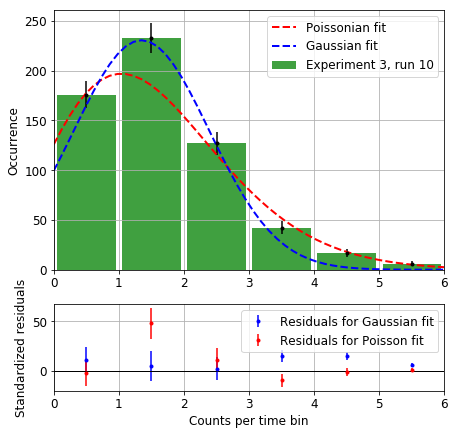

Count rate Gauss
13.472146943912229
Error:
0.042416744255731345
Count rate Poisson
15.62409973846171
Error:
0.05098709460947701
Chi squared Gauss:
24.60829445419347
Chi squared Poisson
13.276656773838278


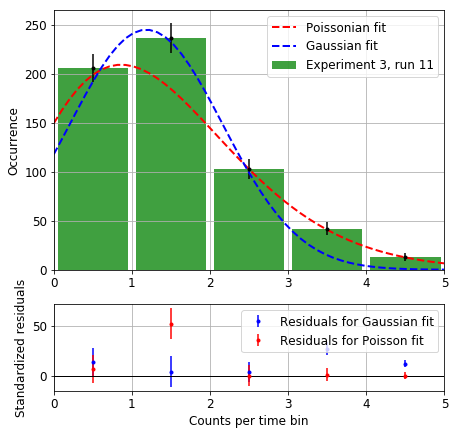

Count rate Gauss
11.826660361812719
Error:
0.03989342585018234
Count rate Poisson
13.903761928598039
Error:
0.04809821124419827
Chi squared Gauss:
30.275027014170313
Chi squared Poisson
11.890530348691554


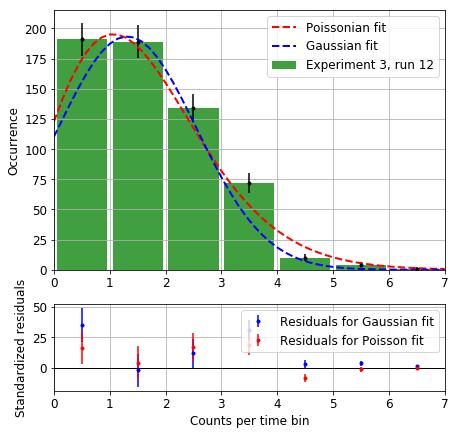

Count rate Gauss
13.142510002098764
Error:
0.05057451231812522
Count rate Poisson
15.877205161128058
Error:
0.051398422774910406
Chi squared Gauss:
25.513679108499694
Chi squared Poisson
16.763718505134626


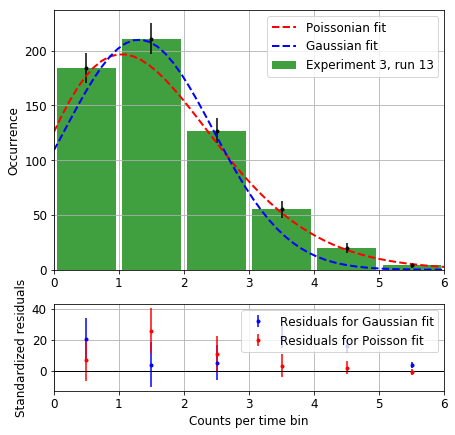

Count rate Gauss
13.082210648497755
Error:
0.046568582365574554
Count rate Poisson
15.66092360859487
Error:
0.05104714405891407
Chi squared Gauss:
27.148698568406356
Chi squared Poisson
5.093095347603454


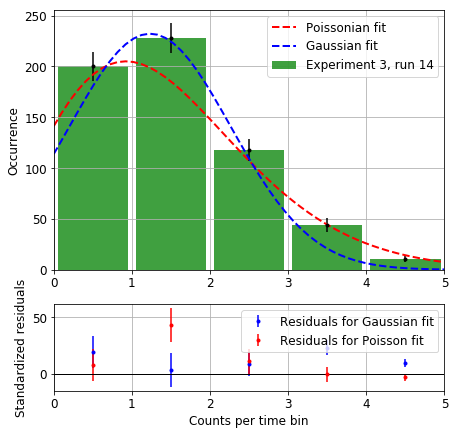

Count rate Gauss
12.320470948192561
Error:
0.04211302800798598
Count rate Poisson
14.471538080799697
Error:
0.04907045781746817
Chi squared Gauss:
22.933565592524296
Chi squared Poisson
10.337201359783318


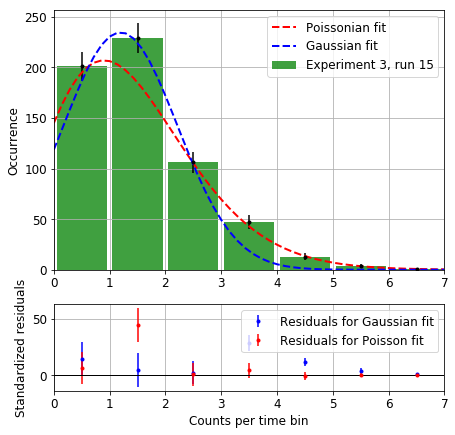

Count rate Gauss
11.938635240379108
Error:
0.04169859140279314
Count rate Poisson
14.226035515896488
Error:
0.04865244924927035
Chi squared Gauss:
34.157346331162934
Chi squared Poisson
9.179631523283746


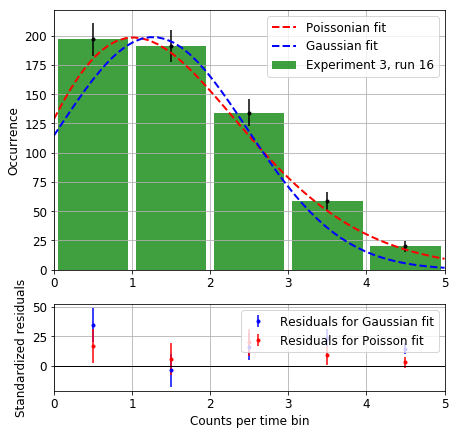

Count rate Gauss
12.65564805710175
Error:
0.04921693726296118
Count rate Poisson
15.408425193043533
Error:
0.0506339596423075
Chi squared Gauss:
27.808738662099206
Chi squared Poisson
6.21034229223249


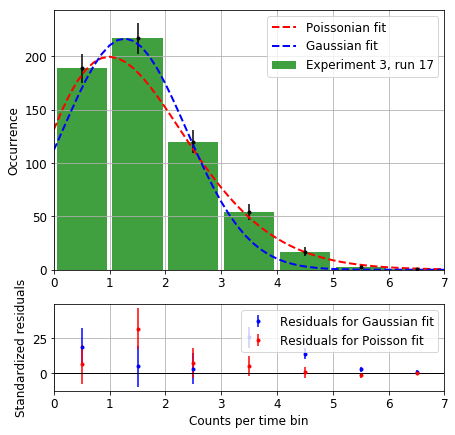

Count rate Gauss
12.695509330209449
Error:
0.04511877482212109
Count rate Poisson
15.207438106023174
Error:
0.05030264166098774
Chi squared Gauss:
29.39470870109826
Chi squared Poisson
6.59132468740173


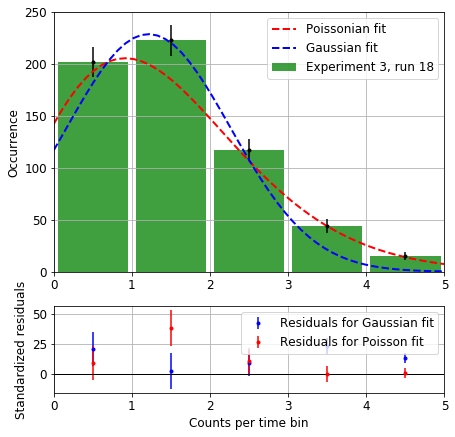

Count rate Gauss
12.128029043690029
Error:
0.04274424939924519
Count rate Poisson
14.396232825250005
Error:
0.04894261780710122
Chi squared Gauss:
26.58699921880676
Chi squared Poisson
7.848260269867234


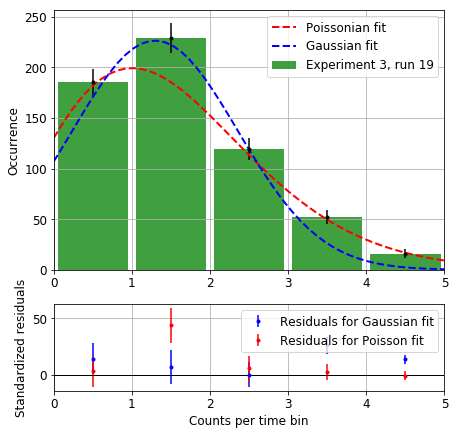

Count rate Gauss
12.96129225764597
Error:
0.04320901821007858
Count rate Poisson
15.287394156806569
Error:
0.0504347062396385
Chi squared Gauss:
25.99534598238626
Chi squared Poisson
8.840987160122351


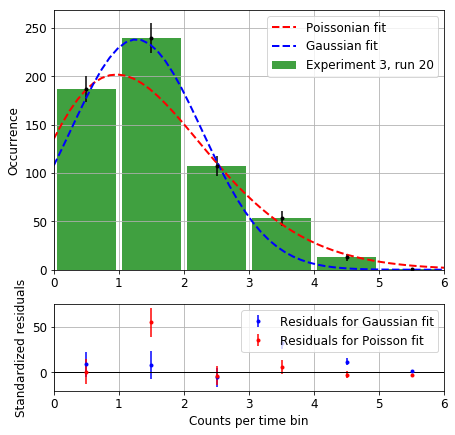

Count rate Gauss
12.671231386845792
Error:
0.041064639664407106
Count rate Poisson
14.905275198521878
Error:
0.049800392247187075
Chi squared Gauss:
32.41954594026722
Chi squared Poisson
24.147315055924878
Summary of all runs:
Mean count Gauss:
12.81733252797881
Error:
0.10344420054078914
Mean count Poisson:
15.15220893245131
Error:
0.1185915959354687


In [129]:
avg31 = leng3*[0]
avg32 = leng3*[0]
for i in range(leng3):
    avg31[i], avg32[i] = woke(d3[i], 'Experiment 3, run %s' %(i+1), T3)

print('Summary of all runs:')
print('Mean count Gauss:')
print(np.mean(avg31))
print('Error:')
print(np.std(avg31)/np.sqrt(len(avg31)))
print('Mean count Poisson:')
print(np.mean(avg32))
print('Error:')
print(np.std(avg32)/np.sqrt(len(avg32)))

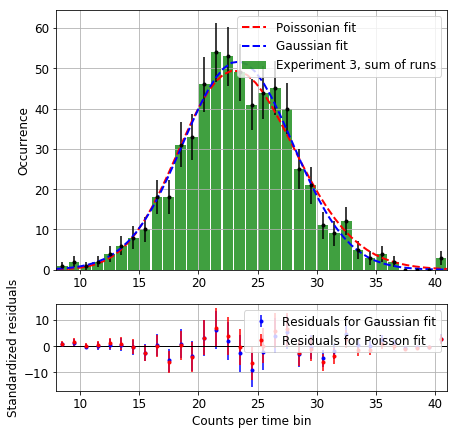

Count rate Gauss
11.667750229012189
Error:
0.18913644389402556
Count rate Poisson
11.790852210559839
Error:
0.19808443896547173
Chi squared Gauss:
18.154838020429484
Chi squared Poisson
20.272265014052493


(11.667750229012189, 11.790852210559839)

In [127]:
#Sum of all runs

woke(sumdat3, 'Experiment 3, sum of runs', T3*leng3)

C:\Users\Tristan\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


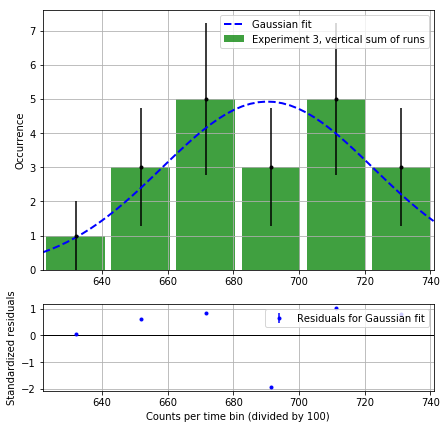

Chi squared test for Gaussian fit:
20.0
Count rate:
345.2


In [41]:
#Vertical sum of all runs

gs = gridspec.GridSpec(2,1, height_ratios=[3,1])
plt.figure(figsize=(7,7))

bins=6

ax0=plt.subplot(gs[0])
plt.grid(True)
e = plt.hist(sumvert, bins, facecolor='green', alpha=0.75, rwidth=0.9, label='Experiment 3, vertical sum of runs')
mean = np.mean(sumvert)
count = mean/2
variance = np.var(sumvert)
sigma = np.sqrt(variance)
x = np.linspace(min(sumvert), max(sumvert))
entries, bin_edges, patches = e
area = sum(np.diff(bin_edges)*entries)
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
gparameters, gcov_matrix = curve_fit(gauss, bin_middles, entries/area)
chig = chi(area*gauss(bin_middles, *gparameters), entries)
plt.ylabel('Occurrence')
plt.plot(x, area*gauss(x,mean,sigma), 'b--', lw=2, label='Gaussian fit')
plt.errorbar(bin_middles, entries, yerr=np.sqrt(entries), fmt='k.')
ax1=plt.subplot(gs[1],sharex=ax0)
plt.xlim((min(sumvert), max(sumvert)))
plt.plot(x,0*x, 'k', lw=1)
plt.errorbar(bin_middles, entries-area*gauss(bin_middles,mean,sigma), yerr=0, fmt='b.', label='Residuals for Gaussian fit')
ax0.legend(loc='upper right')
ax1.legend(loc='upper right')
plt.ylabel('Standardized residuals')
plt.xlabel('Counts per time bin (divided by 100)')
plt.grid(True)
plt.show()

print('Chi squared test for Gaussian fit:')
print(chig)
print('Count rate:')
print(count)

#Poisson distribution could not be plotted due to the high x-values
#Specifically, we get overflow errors because of the factorial in the Poisson distribution

# TECH. ANALYSIS

In [42]:
tech2=[]
tech5=[]
tech20=[]

i=0
while i<len(tech):
    tech2=np.append(tech2,np.sum(tech[i:i+1]))
    i+=2
i=0
while i<len(tech):
    tech5=np.append(tech5,np.sum(tech[i:i+4]))
    i+=5
i=0
while i<len(tech):
    tech20=np.append(tech20,np.sum(tech[i:i+19]))
    i+=20

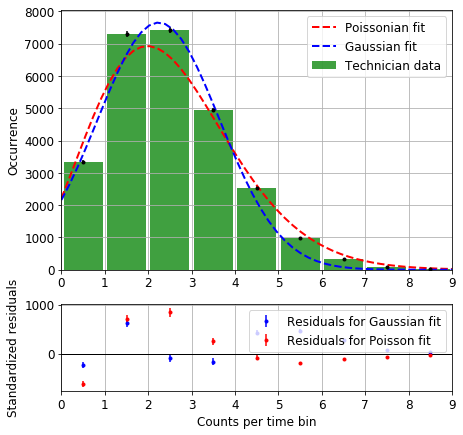

Count rate Gauss
11.188647623000245
Error:
0.03425366847046504
Count rate Poisson
12.494612869946561
Error:
0.03848101041815887
Chi squared Gauss:
677.465820465392
Chi squared Poisson
434.5559384104552


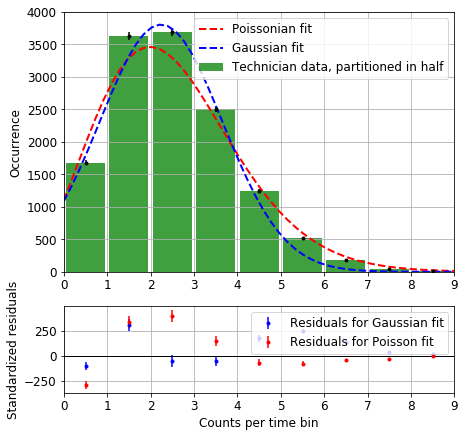

Count rate Gauss
5.601517849451175
Error:
0.04871737299675808
Count rate Poisson
6.257204244285799
Error:
0.05446245122055036
Chi squared Gauss:
339.6543899888924
Chi squared Poisson
192.76736995636074


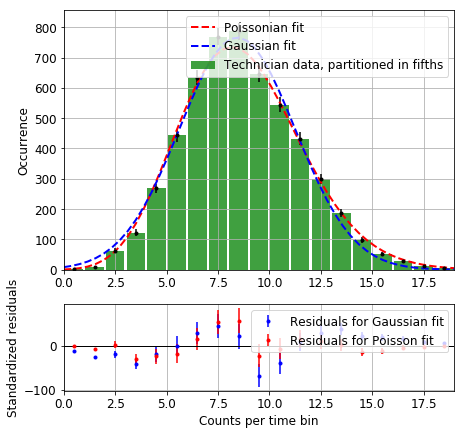

Count rate Gauss
8.435905957794908
Error:
0.15306794929132897
Count rate Poisson
8.683946877468697
Error:
0.16039154902375907
Chi squared Gauss:
324.16960978678077
Chi squared Poisson
37.18604578756644


(8.435905957794908, 8.683946877468697)

In [179]:
woke(tech, 'Technician data', T1)
woke(list(map(int,tech2)), 'Technician data, partitioned in half', T1*2)
woke(list(map(int,tech5)), 'Technician data, partitioned in fifths', T1*5)

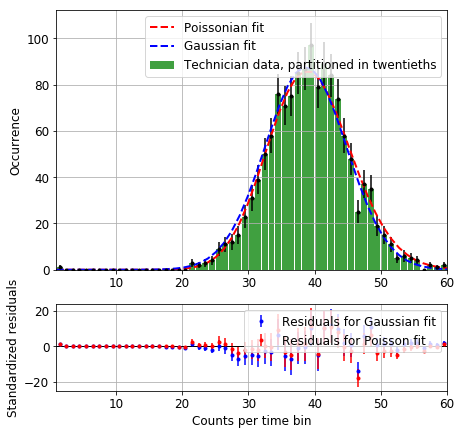

Count rate Gauss
7.724723080884016
Error:
2.6916772383626464
Count rate Poisson
9.84407433076644
Error:
1.7072210749913377


In [153]:
ntech20 = list(map(int,tech20))
period = T1*20

gs = gridspec.GridSpec(2,1, height_ratios=[3,1])
plt.figure(figsize=(7,7))
bins=range(max(ntech20)+1)
ax0=plt.subplot(gs[0])
plt.grid(True)
e = plt.hist(ntech20, bins, facecolor='green', alpha=0.75, rwidth=0.9, label='Technician data, partitioned in twentieths')
mean = np.mean(ntech20)
variance = np.var(ntech20)
sigma = np.sqrt(variance)
x = np.linspace(min(ntech20), max(ntech20))
entries, bin_edges, patches = e
area = sum(np.diff(bin_edges)*entries)
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
pparameters, pcov_matrix = curve_fit(poisson, bin_middles, entries/area)
gparameters, gcov_matrix = curve_fit(gauss, bin_middles, entries/area)
countg = np.abs(gparameters[0]/period)
countp = np.abs(pparameters[0]/period)
nzbin, nzent = nozeros(bin_middles, entries)
chig = chi(area*gauss(nzbin, *gparameters), nzent)
chip = chi(area*poisson(nzbin, *pparameters), nzent)
plt.ylabel('Occurrence')
plt.plot(x, area*poisson(x, *pparameters), 'r--', lw=2, label='Poissonian fit')
plt.plot(x, area*gauss(x,mean,sigma), 'b--', lw=2, label='Gaussian fit')
plt.errorbar(bin_middles, entries, yerr=np.sqrt(entries), fmt='k.')
ax1=plt.subplot(gs[1],sharex=ax0)
plt.xlim((min(ntech20), max(ntech20)))
plt.plot(x,0*x, 'k', lw=1)
plt.errorbar(bin_middles, entries-area*gauss(bin_middles, mean, sigma), yerr=np.sqrt(entries), fmt='b.', label='Residuals for Gaussian fit')
plt.errorbar(bin_middles, entries-area*poisson(bin_middles,*pparameters), yerr=np.sqrt(entries), fmt='r.', label='Residuals for Poisson fit')
ax0.legend(loc='upper right')
ax1.legend(loc='upper right')
plt.ylabel('Standardized residuals')
plt.xlabel('Counts per time bin')
plt.grid(True)
plt.show()

print('Count rate Gauss')
print(countg)
print('Error:')
print(10*gparameters[1]/np.sqrt(len(ntech20)))
print('Count rate Poisson')
print(countp)
print('Error:')
print(10*np.sqrt(pparameters[0])/np.sqrt(len(ntech20)))

# COUNTING DATA

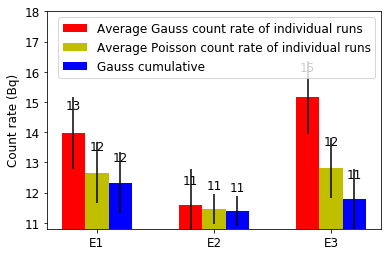

In [184]:
N = 3

p_means = (np.mean(avg12), np.mean(avg22), np.mean(avg32))
p_std = (1.2, 1.2, 1.2)

g_means = (np.mean(avg11), np.mean(avg21), np.mean(avg31))
g_std = (1, 0.5, 1)

gcum_means = (12.33, 11.39, 11.79)
gcum_std = (1,0.5,1)

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots()
plt.ylim((10.8, 18))
rects1 = ax.bar(ind, p_means, width, color='r', yerr=p_std)
rects2 = ax.bar(ind + width, g_means, width, color='y', yerr=g_std)
rects3 = ax.bar(ind + 2*width, gcum_means, width, color='b', yerr=gcum_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count rate (Bq)')
ax.set_title('')
ax.set_xticks(ind + width)
ax.set_xticklabels(('E1', 'E2', 'E3'))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Average Gauss count rate of individual runs', 'Average Poisson count rate of individual runs','Gauss cumulative'), loc='best')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [ ]:
gcum_means = (11.92, 10.82, 11.67)
gcum_std = (1, 1, 1)